In [21]:
example_segment = './4/'

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


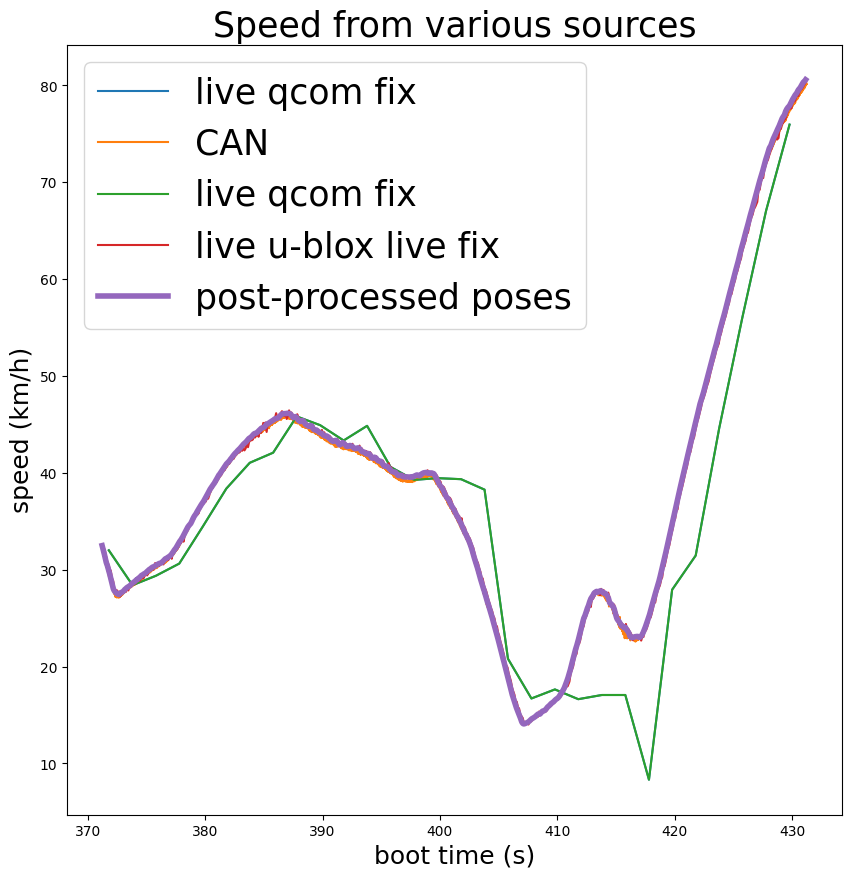

In [23]:
figsize(10,10)

# from qcom gnss data
plot(np.load(example_segment + 'processed_log/GNSS/live_gnss_qcom/t'),
    np.load(example_segment + 'processed_log/GNSS/live_gnss_qcom/value')[:,2] * 3.6,
    label='live qcom fix')

# from can data
plot(np.load(example_segment + 'processed_log/CAN/speed/t'),
     np.load(example_segment + 'processed_log/CAN/speed/value') * 3.6,
     label='CAN');

# from qcom gnss data
plot(np.load(example_segment + 'processed_log/GNSS/live_gnss_qcom/t'),
     np.load(example_segment + 'processed_log/GNSS/live_gnss_qcom/value')[:,2] * 3.6,
     label='live qcom fix');

# from u-blox gnss data
plot(np.load(example_segment + 'processed_log/GNSS/live_gnss_ublox/t'),
     np.load(example_segment + 'processed_log/GNSS/live_gnss_ublox/value')[:,2] * 3.6,
     label='live u-blox live fix');

# from post-processed data
plot(np.load(example_segment + 'global_pose/frame_times'),
     np.linalg.norm(np.load(example_segment + 'global_pose/frame_velocities') * 3.6,axis=1), linewidth=4,
     label='post-processed poses');

title('Speed from various sources', fontsize=25);
legend(fontsize=25);
xlabel('boot time (s)', fontsize=18);
ylabel('speed (km/h)', fontsize=18);

Text(0, 0.5, 'latitude (degrees)')

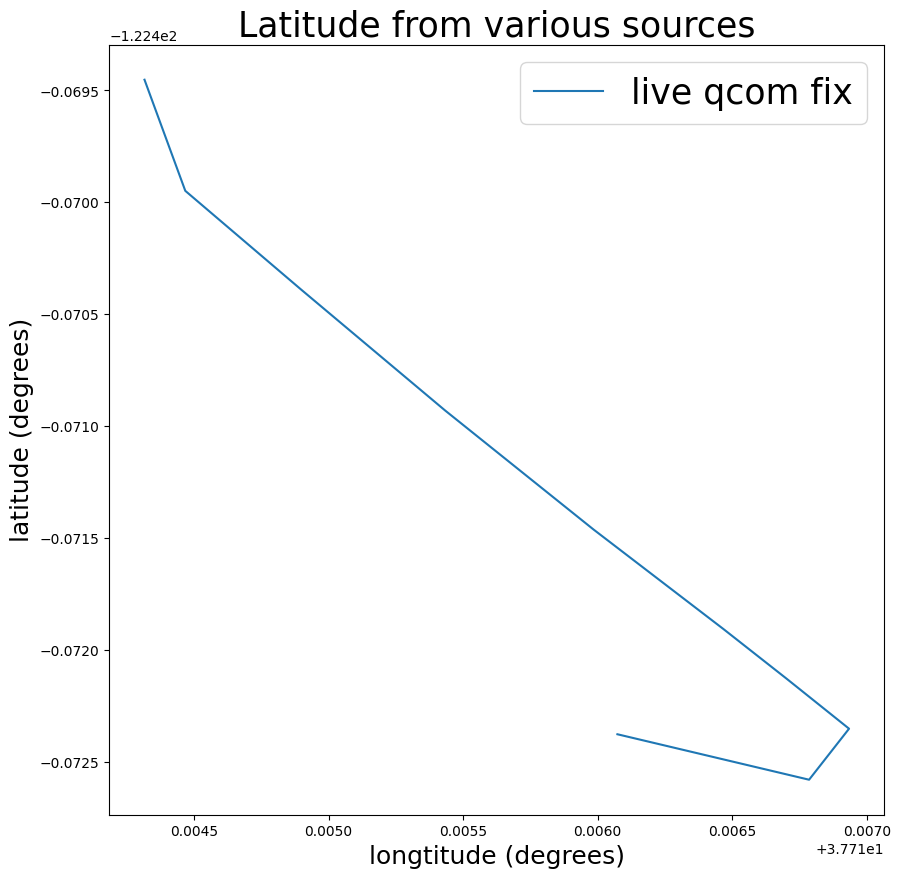

In [24]:
# you loaded the data from the processed_log folder and every third point was a speed measurement
# now load every first and second one is latitude and second is longitude
# plot the latitude and longitude on a map

# from qcom gnss data
plot(
    np.load(example_segment + 'processed_log/GNSS/live_gnss_qcom/value')[::3,0],
    np.load(example_segment + 'processed_log/GNSS/live_gnss_qcom/value')[::3,1],
    label='live qcom fix')

title('Latitude from various sources', fontsize=25)
legend(fontsize=25)
xlabel('longtitude (degrees)', fontsize=18)
ylabel('latitude (degrees)', fontsize=18)


In [25]:
#from last graph print first tuple of latitude and longitude
print(np.load(example_segment + 'processed_log/GNSS/live_gnss_qcom/value')[0,0:2])


[  37.71431633 -122.46945207]


In [43]:
# read all data from speeds.txt which contains id of a car and its speed print for each id its average speed across whole dataset

data = np.loadtxt('speeds.txt', delimiter=',', skiprows=1)

# process data
ids = np.unique(data[:,0])
speeds = []
for id in ids:
    speeds.append(np.mean(data[data[:,0] == id][:,1]))

# print results and save them to file
for i in range(len(ids)):
    print('id: {}, avg speed: {}'.format(ids[i], speeds[i]))
np.savetxt('speeds_avg-MODEL.txt', np.vstack((ids, speeds)).T, delimiter=',', fmt='%d,%.2f', header='id,avg_speed', comments='')

id: 1.0, avg speed: 45.77652256198444
id: 2.0, avg speed: 0.28200468611422463
id: 3.0, avg speed: 0.26044643051188177
id: 4.0, avg speed: 0.9930061299691293
id: 5.0, avg speed: 0.09860685958487102
id: 6.0, avg speed: 48.38489664712575
id: 7.0, avg speed: 41.617866614699714
id: 8.0, avg speed: 51.38747877410898
id: 9.0, avg speed: 44.59576697076447
id: 10.0, avg speed: 8.142421542510826
id: 11.0, avg speed: 0.24087879548132
id: 12.0, avg speed: 42.42747869874306
id: 13.0, avg speed: 38.87576654956767
id: 14.0, avg speed: 24.35320080163084
id: 15.0, avg speed: 40.725922556897196
id: 16.0, avg speed: 37.81283053713732
id: 17.0, avg speed: 38.98655749532439
id: 18.0, avg speed: 38.32084688842135
id: 19.0, avg speed: 48.241346769118095
id: 20.0, avg speed: 39.04730681774646
id: 21.0, avg speed: 11.12588598920602
id: 22.0, avg speed: 41.262851373195254
id: 23.0, avg speed: 35.3741588047136
id: 24.0, avg speed: 38.175321563406435
id: 25.0, avg speed: 30.011828985529796
id: 26.0, avg speed: 30

In [23]:
cv_path = "Draždany/3W_Sid_StP_Trajectory_Sample/20220511_100012_Sid_StP_3W_d_1_1_ann.csv"

import pandas as pd

# read data from csv file, skip bad lines, and print first 5 rows
data = pd.read_csv(cv_path, delimiter=';', on_bad_lines='skip')

data


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Track ID,Type,Track Width [m],Track Width Displacement [m],Track Length [m],Track Length Displacement [m],Entry Gate,Entry Time [s],Exit Gate,Exit Time [s],Traveled Dist. [m],Avg. Speed [km/h],Trajectory(x [m],y [m],Speed [km/h],Tan. Acc. [ms-2],Lat. Acc. [ms-2],Time [s],Angle [rad],)
1,Bicycle,1.0,0.0,2.5,0.0000,-,-,-,-,13.97,20.642792,411407.46,5655265.49,21.5355,-0.2282,-0.0059,0.0000,1.0293,411407.56,5655265.67,21.5097,-0.2022,0.0031,0.033367,1.0292,411407.66,5655265.84,21.4863,-0.1865,0.0152,0.066733,1.0293,411407.77,5655266.01,21.4668,-0.1383,-0.0010,0.1001,1.0292,411407.87,5655266.18,21.4527,-0.0964,0.0007,0.133467,1.0293,411407.97,5655266.36,21.4420,-0.0818,0.0106,0.166833,1.0293,411408.08,5655266.53,21.4347,-0.0410,0.0248,0.2002,1.0292,411408.18,5655266.70,21.4334,0.0196,-0.0147,0.233567,1.0292,411408.28,5655266.87,21.4367,0.0351,0.0101,0.266933,1.0292,411408.38,5655267.04,21.4443,0.0915,0.0003,0.3003,1.0292,411408.49,5655267.21,21.4569,0.1179,0.0121,0.333667,1.0292,411408.59,5655267.38,21.4724,0.1414,0.0077,0.367033,1.0291,411408.69,5655267.55,21.4919,0.1822,0.0183,0.4004,1.0291,411408.79,5655267.72,21.5187,0.2653,-0.0009,0.433767,1.0290,411408.90,5655267.89,21.5543,0.3272,0.0018,0.467133,1.0291,411409.00,5655268.06,21.5721,0.0881,0.0101,0.5005,1.0290,411409.10,5655268.23,21.5848,0.1242,0.0044,0.533867,1.0290,411409.20,5655268.40,21.6022,0.1645,0.0140,0.567233,1.0288,411409.31,5655268.57,21.6246,0.2099,0.0078,0.6006,1.0289,411409.41,5655268.74,21.6510,0.2294,0.0142,0.633967,1.0289,411409.51,5655268.91,21.6794,0.2437,0.0295,0.667333,1.0289,411409.61,5655269.08,21.7108,0.2784,0.0221,0.7007,1.0287,411409.72,5655269.25,21.7455,0.2999,0.0170,0.734067,1.0287,411409.82,5655269.42,21.7814,0.2978,0.0230,0.767433,1.0286,411409.92,5655269.59,21.8177,0.3053,0.0302,0.8008,1.0285,411410.03,5655269.76,21.8542,0.3036,0.0442,0.834167,1.0284,411410.13,5655269.94,21.8893,0.2799,0.0408,0.867533,1.0282,411410.23,5655270.11,21.9226,0.2750,0.0482,0.9009,1.0280,411410.34,5655270.28,21.9543,0.2534,0.0503,0.934267,1.0279,411410.44,5655270.45,21.9834,0.2297,0.0581,0.967633,1.0276,411410.55,5655270.63,22.0088,0.1943,0.0663,1.0010,1.0274,411410.65,5655270.81,22.0298,0.1555,0.0792,1.034367,1.0271,411410.76,5655270.98,22.0457,0.1095,0.0796,1.067733,1.0268,411410.87,5655271.16,22.0566,0.0708,0.0913,1.1011,1.0264,411410.97,5655271.34,22.0619,0.0185,0.0924,1.134467,1.0260,411411.08,5655271.52,22.0595,-0.0591,0.1167,1.167833,1.0255,411411.19,5655271.69,22.0495,-0.1072,0.1119,1.2012,1.0250,411411.30,5655271.87,22.0327,-0.1728,0.1181,1.234567,1.0244,411411.41,5655272.05,22.0066,-0.2608,0.1419,1.267933,1.0238,411411.52,5655272.23,21.9708,-0.3354,0.1428,1.3013,1.0231,411411.63,5655272.41,21.9249,-0.4296,0.1625,1.334667,1.0223,411411.73,5655272.59,21.8682,-0.5143,0.1677,1.368033,1.0215,411411.84,5655272.77,21.7986,-0.6445,0.1831,1.4014,1.0206,411411.95,5655272.94,21.7160,-0.7307,0.1882,1.434767,1.0196,411412.06,5655273.12,21.6207,-0.8557,0.2169,1.468133,1.0179,411412.17,5655273.30,21.5123,-0.9497,0.2125,1.5015,1.0168,411412.28,5655273.47,21.3923,-1.0479,0.2144,1.534867,1.0156,411412.38,5655273.64,21.2615,-1.1299,0.2225,1.568233,1.0143,411412.49,5655273.82,21.1214,-1.2028,0.2323,1.6016,1.0129,411412.60,5655273.99,20.9730,-1.2689,0.2481,1.634967,1.0113,411412.70,5655274.16,20.8184,-1.3052,0.2368,1.668333,1.0098,411412.81,5655274.32,20.6600,-1.3319,0.2342,1.7017,1.0082,411412.91,5655274.49,20.4986,-1.3550,0.2474,1.735067,1.0058,411413.01,5655274.65,20.3349,-

In [42]:
import csv

with open(cv_path, 'r') as f:
    reader = csv.reader(f, delimiter=';')
    # Remove all pedestrains and cyclists
    data = [row for row in reader if row[1] not in [' Pedestrian', ' Bicycle']]
    data = list(data)

# print first 5 rows and only columns 0, 1, 11 and save them to file
for row in data[:36]:
    print(row[0], row[1], row[11])
np.savetxt('cv_filtered.txt', data, delimiter=',', fmt='%s', header='id,category,speed', comments='')

Track ID  Type  Avg. Speed [km/h]
3  Car  54.995097
4  Medium Vehicle  63.032900
5  Car  60.314801
6  Bus  14.519667
7  Car  49.443623
8  Car  2.548233
9  Car  2.247760
10  Car  57.020243
11  Car  48.013838
13  Car  48.335835
15  Car  30.330512
16  Car  50.471856
17  Car  46.784190
18  Car  48.753687
19  Car  46.761585
20  Car  60.945682
22  Car  47.543303
26  Car  51.180146
27  Car  44.090025
28  Car  38.185213
29  Medium Vehicle  38.411573
31  Car  50.364144
32  Car  43.504250
33  Car  45.692991
37  Car  9.102807
41  Bus  21.184402
42  Bus  7.744058
43  Bus  5.995487
46  Car  41.756283
47  Car  35.475410
48  Car  40.594709
50  Car  35.881168
51  Car  1.469177
53  Medium Vehicle  60.503845
54  Car  55.984763


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (120,) + inhomogeneous part.

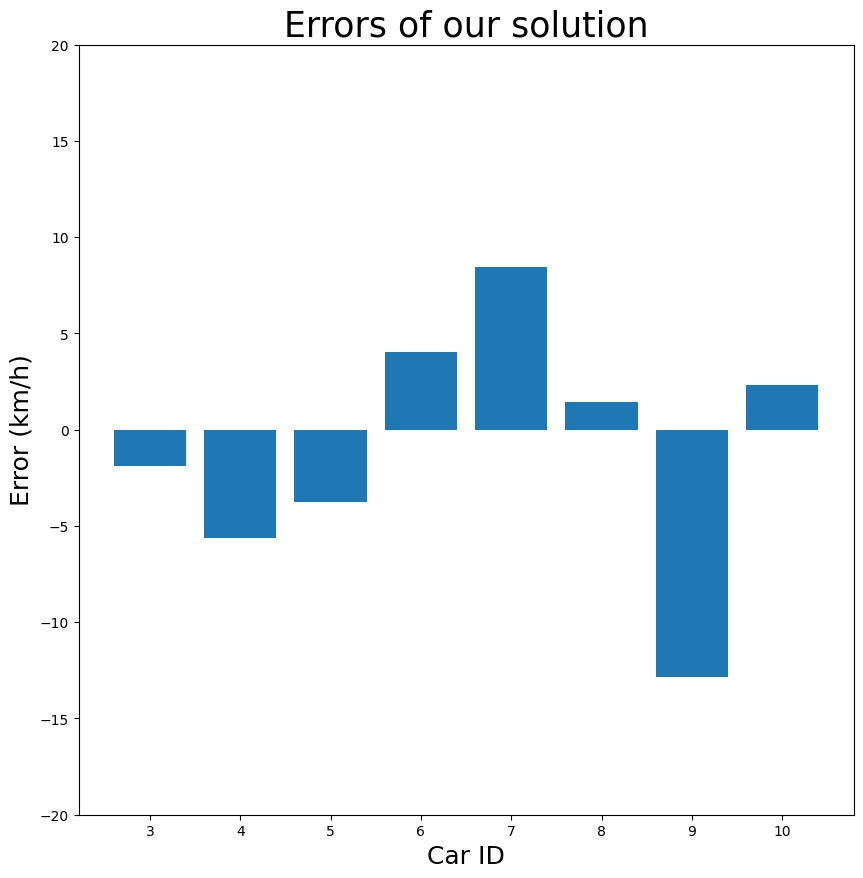

In [50]:
import pandas as pd
# load data from results.txt which contains id of a car and next to it are two speed one is from or solution and second one is grond truth
data = pd.read_csv('results.txt', delimiter=' ', skiprows=1)

# process data
ids = data.iloc[:,0]
errors = data.iloc[:,1].astype(float) - data.iloc[:,2].astype(float)

# plot results and make y with better scale
plt.figure(figsize=(10,10))
plt.bar(ids, errors)
plt.title('Errors of our solution', fontsize=25)
plt.xlabel('Car ID', fontsize=18)
plt.ylabel('Error (km/h)', fontsize=18)
plt.ylim(-20, 20)
# save plot to file
plt.savefig('errors.png')
